In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def graph_raw(filepath,bin_name):

    # Load the data
    data = pd.read_csv(filepath)
    
    # Filter out 'MAF_OR_AC_IS_ZERO' entries
    data_filtered = data[data['category'] != 'MAF_OR_AC_IS_ZERO']
    
    
    # Plot
    plt.figure(figsize=(15,8))
    sns.barplot(data=data_filtered, x=bin_name, y="count", hue='category')

    # Improve the layout
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.title('Counts by Bin and Category')
    plt.xlabel('Bin')
    plt.ylabel('Count')
    plt.legend(title='Category')

    # Show plot
    plt.show()
    
def graph_frac(filepath,bin_name):
    # Load the data
    data = pd.read_csv(filepath)
    
    # Filter out 'MAF_OR_AC_IS_ZERO' entries
    data_filtered = data[data['category'] != 'MAF_OR_AC_IS_ZERO']
    
    
    lis=pd.Series()
    
    for _bin in data[bin_name].unique():
        
        
        lis=pd.concat([lis,
                     data[data[bin_name]==_bin]["count"]
              /data[data[bin_name]==_bin].sum()["count"]])
    
    data_filtered["frac"]=lis
    
    plt.figure(figsize=(15,8))
    sns.barplot(data=data_filtered, x=bin_name, y="frac", hue='category')

    # Improve the layout
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.title('Fraction of bin')
    plt.xlabel('Bin')
    plt.ylabel('Frac')
    plt.legend(title='Category')


def graph_ratio(filepath,bin_name):
    # Load the data
    data = pd.read_csv(filepath)
    
    # Filter out 'MAF_OR_AC_IS_ZERO' entries
    data_filtered = data[data['category'] != 'MAF_OR_AC_IS_ZERO']
    
    
    ratios=pd.Series()
    
    for _bin in data[bin_name].unique():
        
        current_bin=data[data[bin_name]==_bin]
        
        ratio=current_bin[(current_bin["category"]=="COMMON")]["count"]/(current_bin[(current_bin["category"]=="RARE") | (current_bin["category"]=="ULTRARARE") | (current_bin["category"]=="SINGLETON")]["count"].sum())
        ratios=pd.concat([ratios,ratio])
   
    new_df=pd.DataFrame({'bins':data[bin_name].unique(),'ratios':ratios})
    
    plt.figure(figsize=(10,8))
    sns.barplot(data=new_df, x='bins', y="ratios")
    
    plt.title('Common to rare ratio')
    plt.xlabel('Bin')
    plt.ylabel('Ratio')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    
    #data_filtered["ratio"]=lis

/tmp/ipykernel_2369876/302050915.py:73: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  ratios=pd.concat([ratios,ratio])


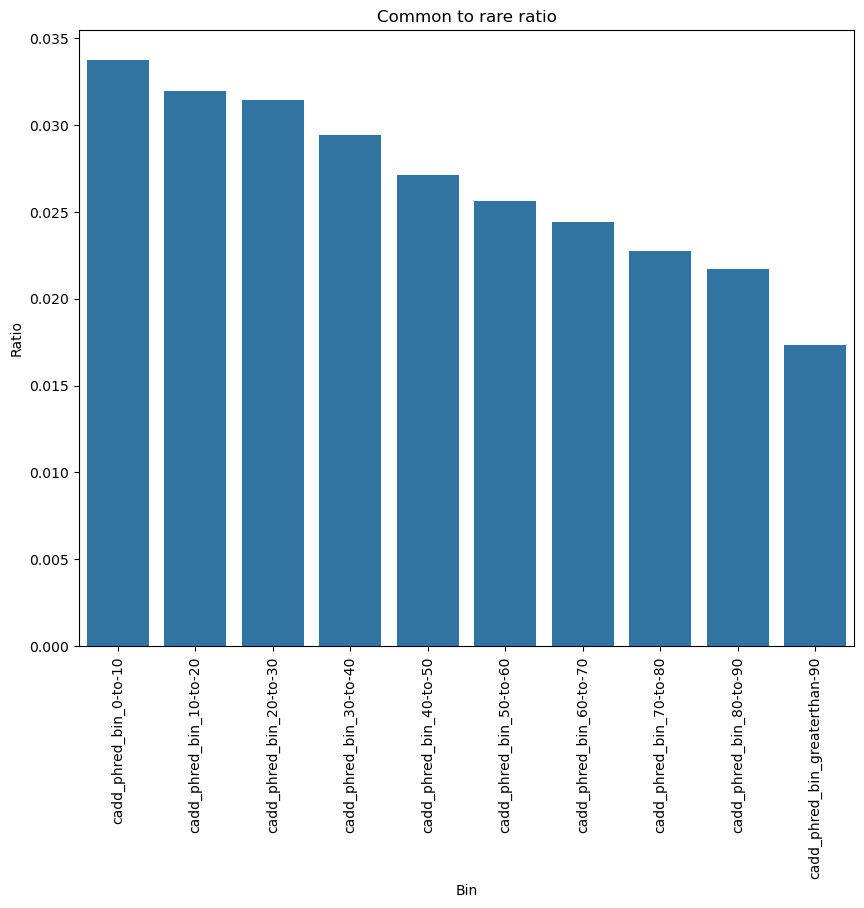

In [163]:
cadd_path='/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/2.filter/cadd_phred_summary.csv/part-00000-64b7fb26-07dd-442b-9f06-bd292214045e-c000.csv'

graph_ratio(cadd_path,"cadd_phred_bin")

/tmp/ipykernel_2369876/932693548.py:41: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  lis=pd.concat([lis,
/tmp/ipykernel_2369876/932693548.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["frac"]=lis


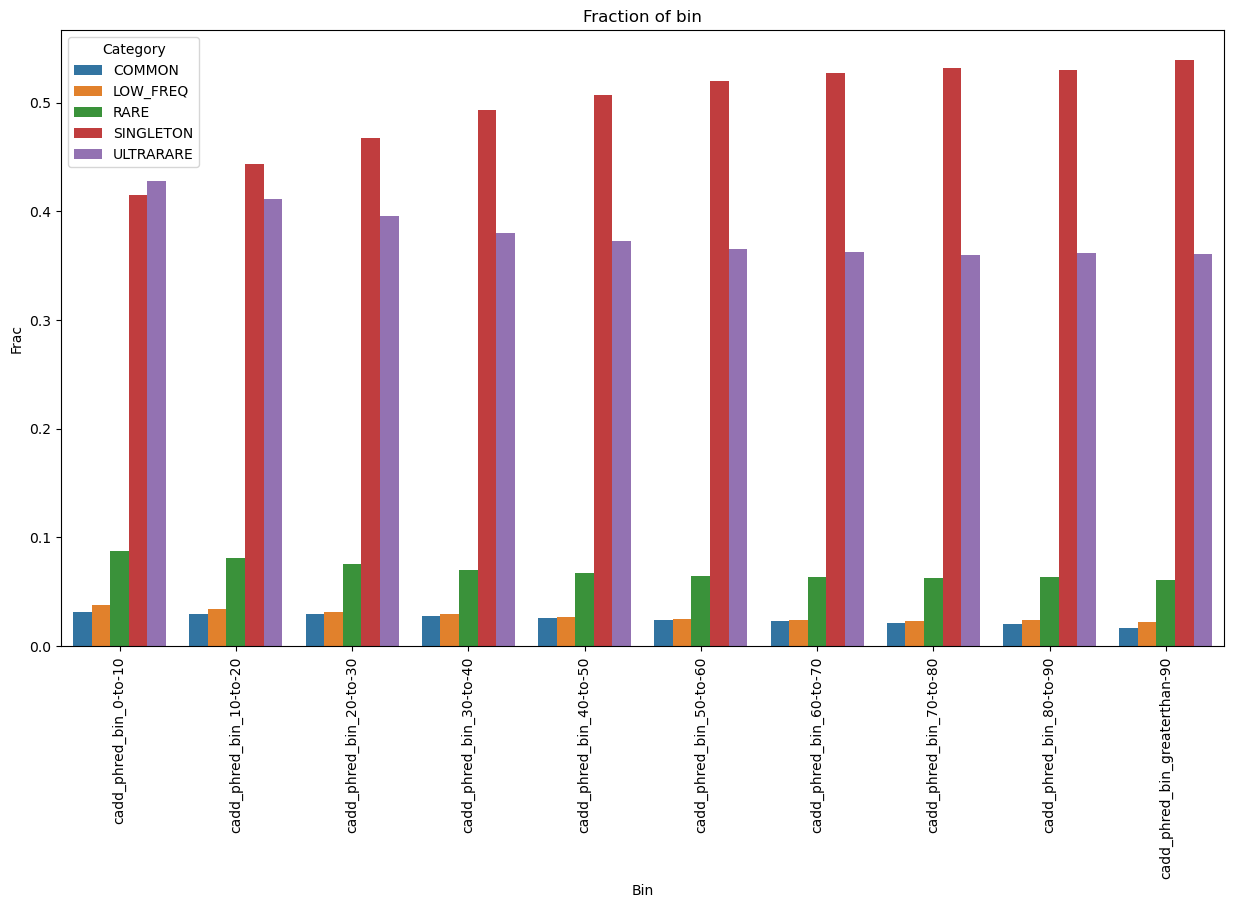

In [148]:
graph_frac(cadd_path,"cadd_phred_bin")

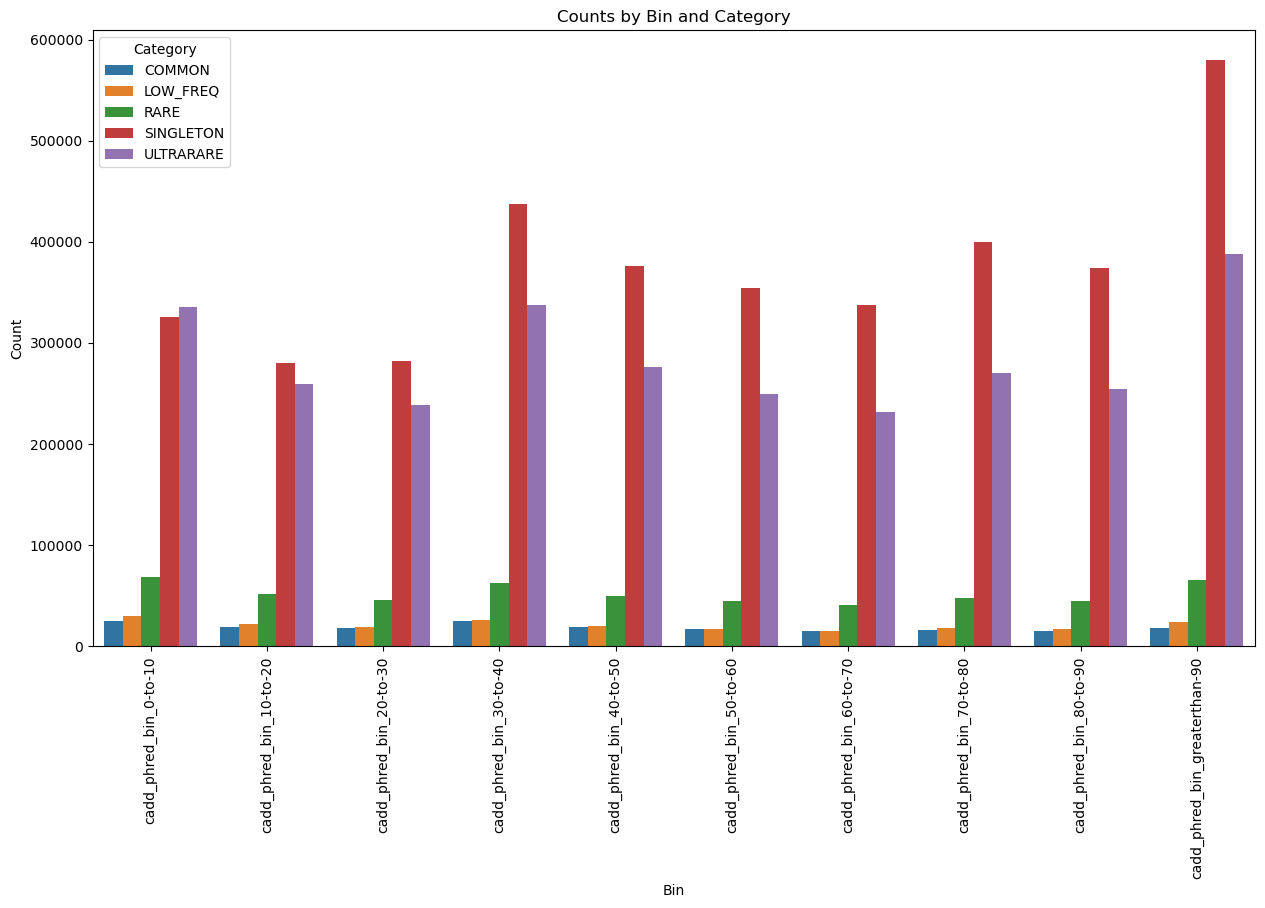

In [149]:
graph_raw(cadd_path,"cadd_phred_bin")

/tmp/ipykernel_2369876/932693548.py:73: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  ratios=pd.concat([ratios,ratio])


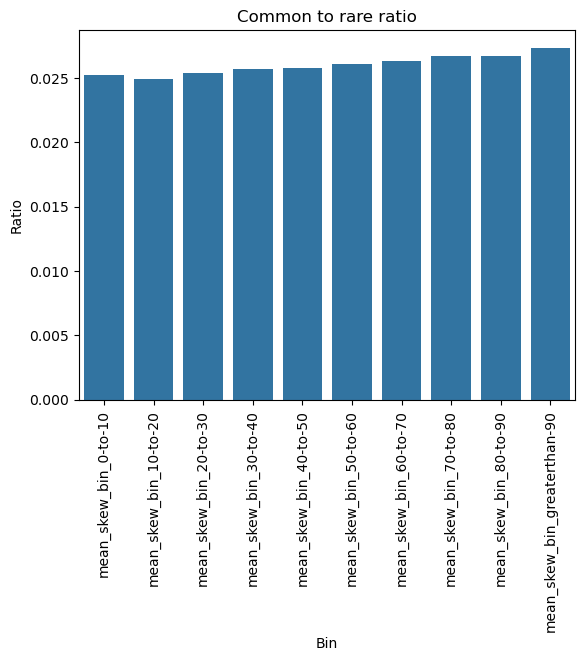

In [152]:
skew_path='/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/2.filter/mean_skew_summary.csv/part-00000-50de4dcf-ecfd-4a13-9bd7-36a9db180e14-c000.csv'
graph_ratio(skew_path,"mean_skew_bin")

/tmp/ipykernel_2369876/932693548.py:41: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  lis=pd.concat([lis,
/tmp/ipykernel_2369876/932693548.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["frac"]=lis


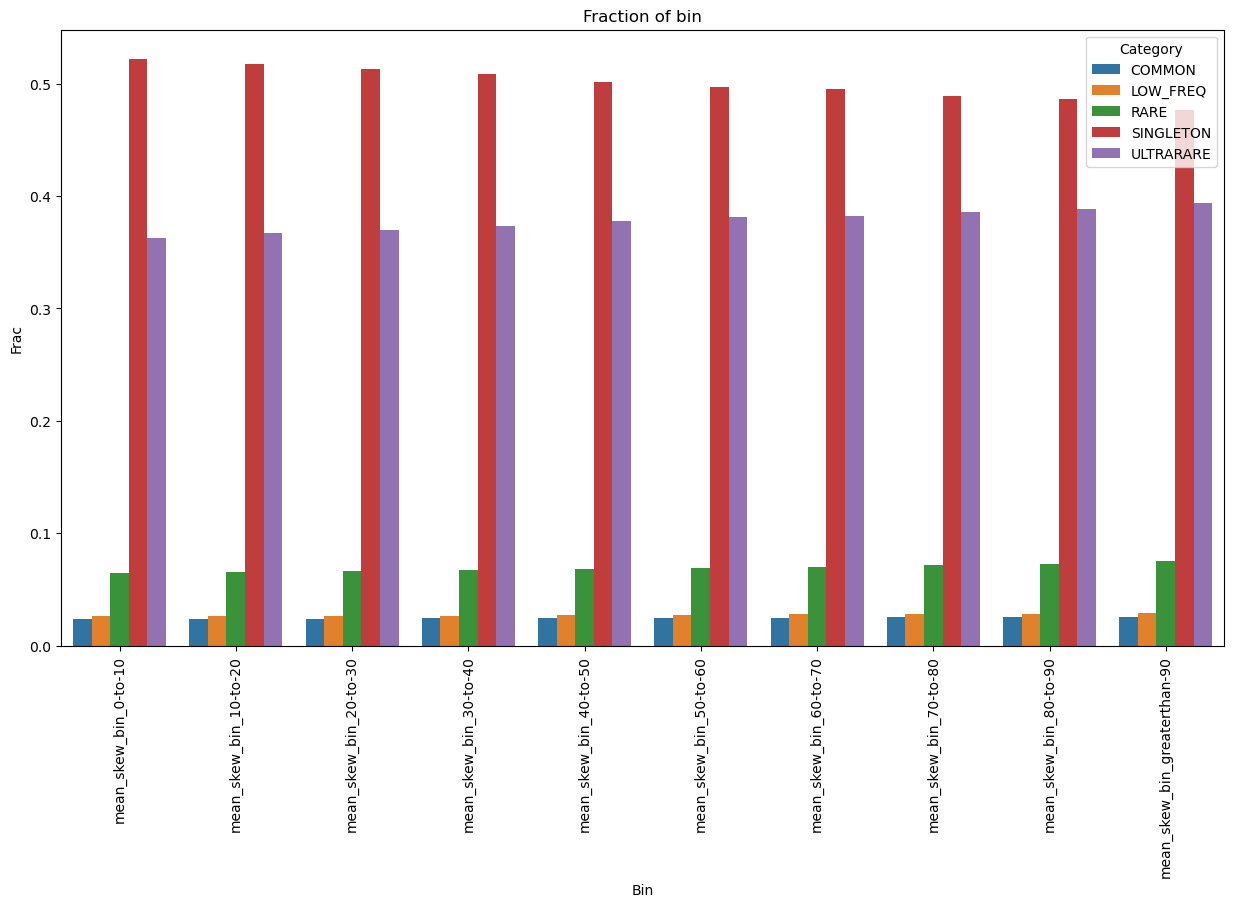

In [153]:
graph_frac(skew_path,"mean_skew_bin")

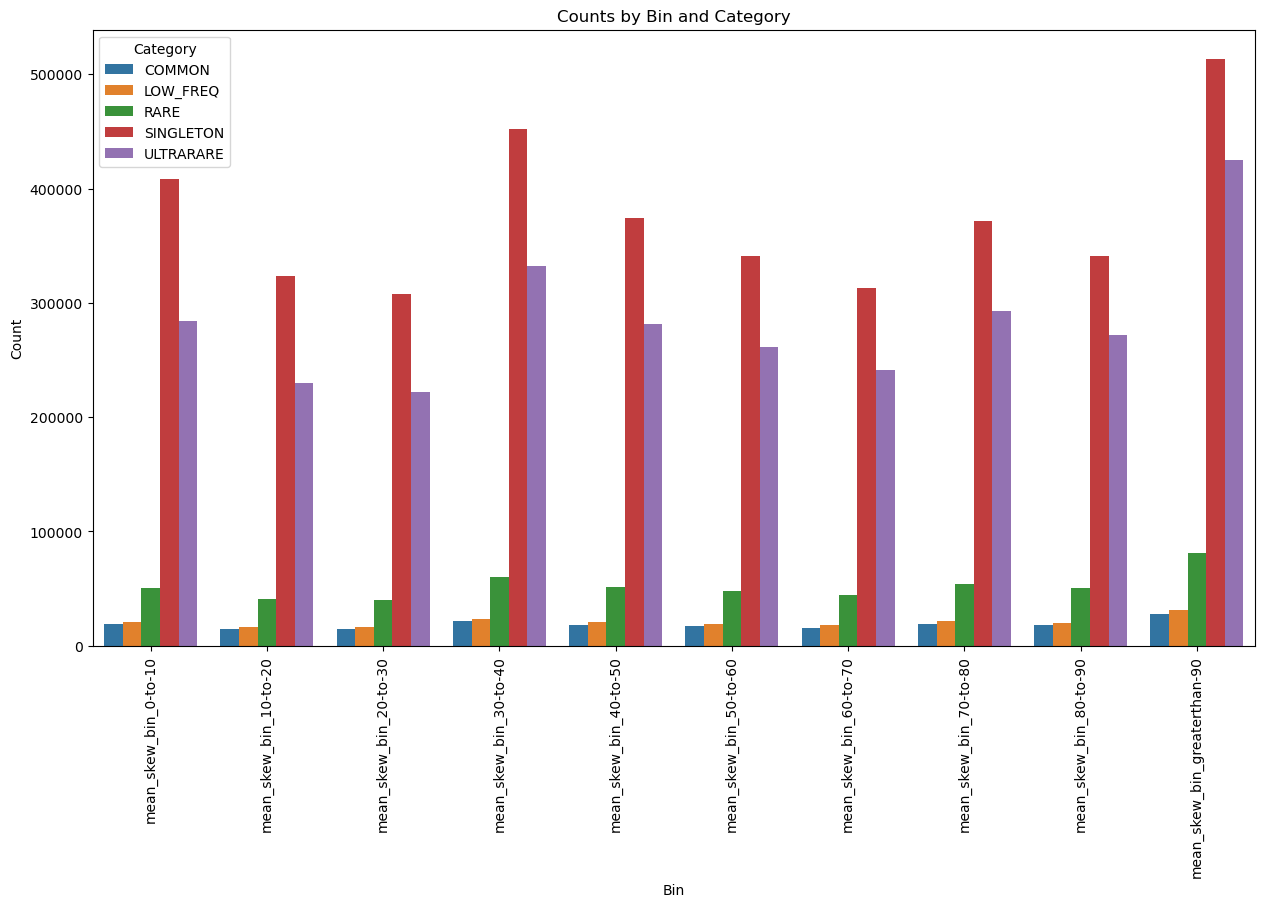

In [154]:
graph_raw(skew_path,"mean_skew_bin")

/tmp/ipykernel_2369876/932693548.py:73: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  ratios=pd.concat([ratios,ratio])


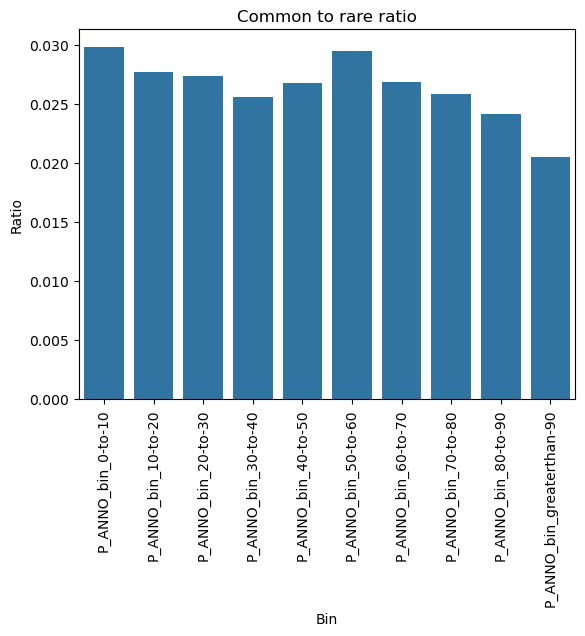

In [155]:
phylop_path='/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/2.filter/P_ANNO_summary.csv/part-00000-17bad972-27e8-4848-a7a0-59fc8ddb1200-c000.csv'
graph_ratio(phylop_path,"P_ANNO_bin")

/tmp/ipykernel_2369876/932693548.py:41: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  lis=pd.concat([lis,
/tmp/ipykernel_2369876/932693548.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["frac"]=lis


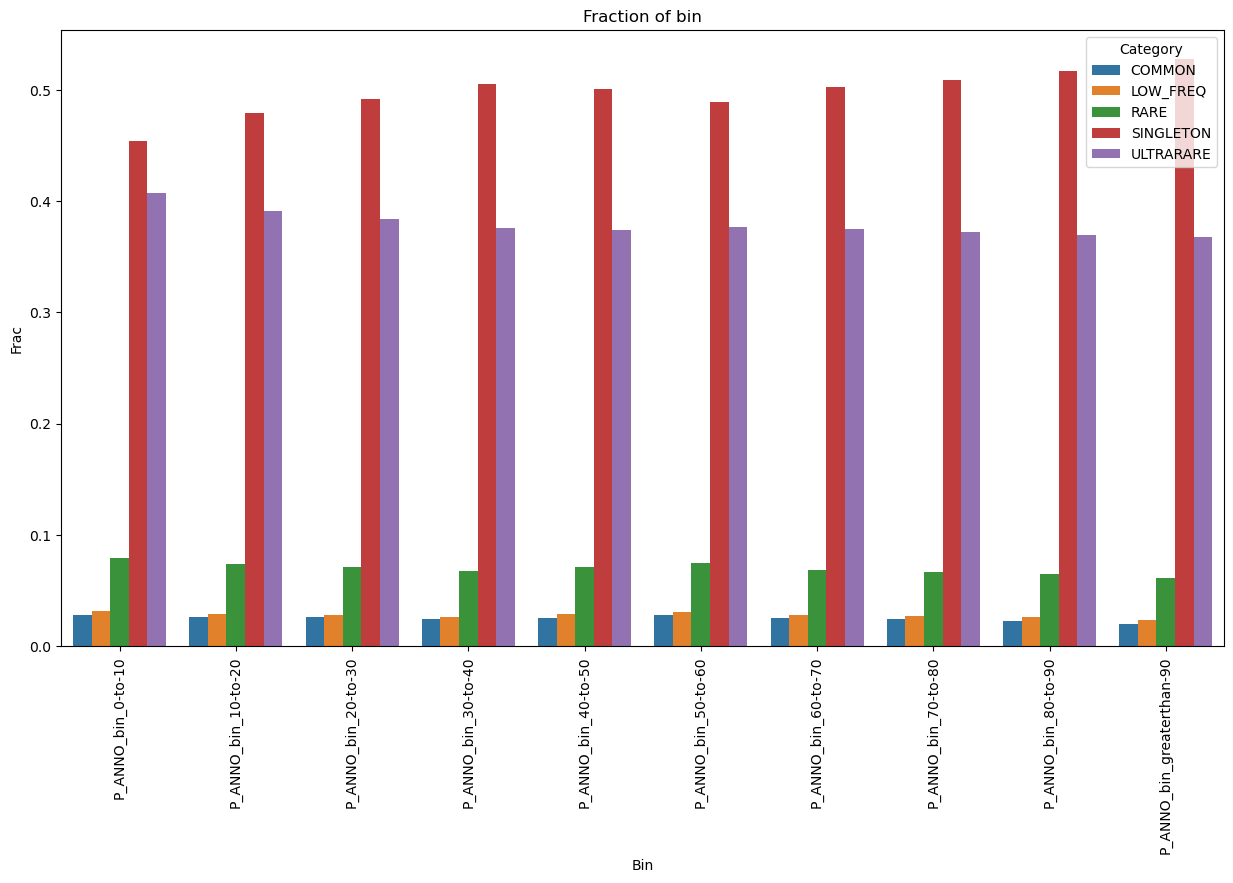

In [156]:
graph_frac(phylop_path,"P_ANNO_bin")

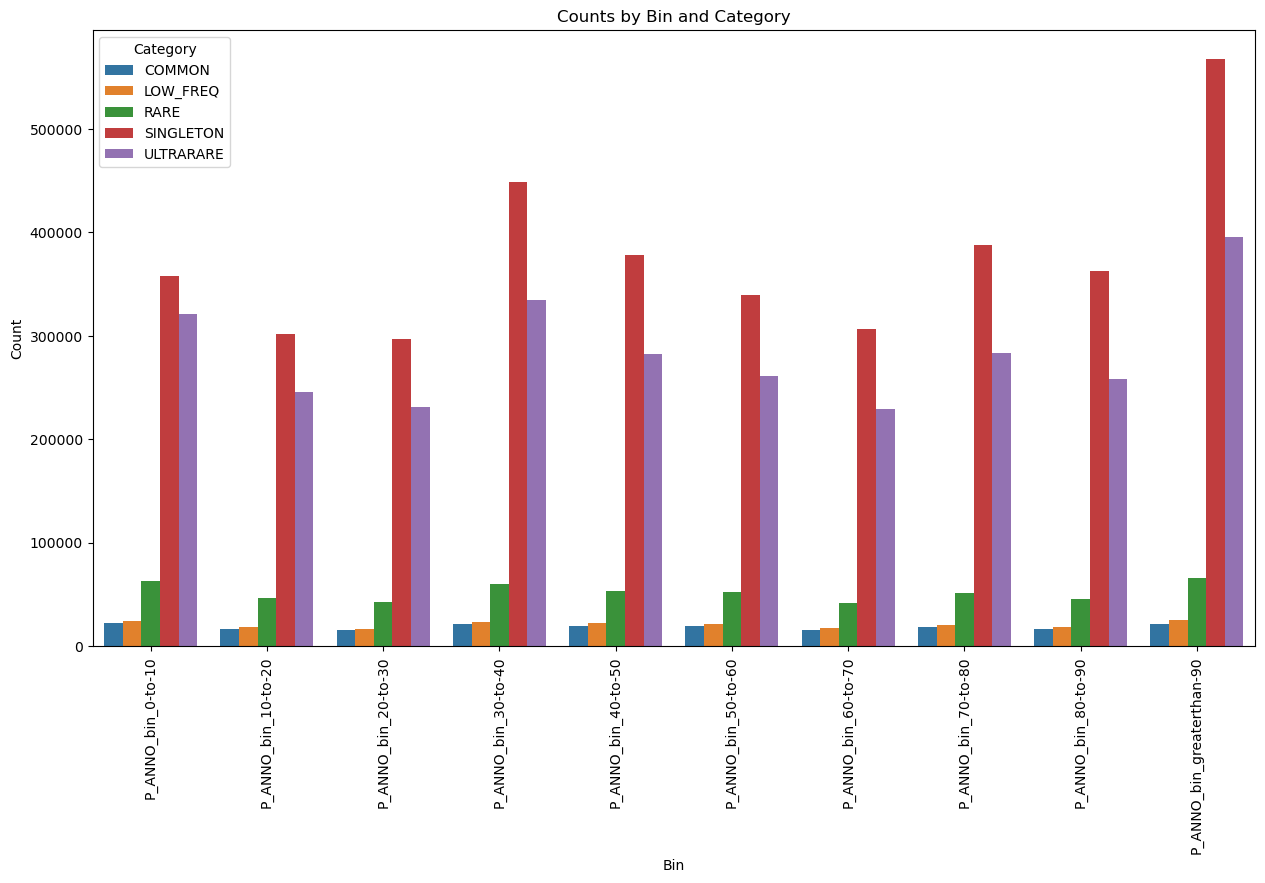

In [157]:
graph_raw(phylop_path,"P_ANNO_bin")